In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = 2 * X + 1 + np.random.randn(1000, 1) * 0.5

In [ ]:
# Инициализация параметров
theta = np.zeros((2, 1))
alpha = 0.01
epochs = 50
batch_size = 32

In [ ]:
# Функция потерь
def compute_loss(X, y, theta):
    m = len(X)
    return np.mean((X.dot(theta[0]) + theta[1] - y) ** 2) / 2

In [ ]:
# Batch GD
loss_batch = []
for _ in range(epochs):
    grad = np.array([
        np.mean((X.dot(theta[0]) + theta[1] - y) * X),
        np.mean(X.dot(theta[0]) + theta[1] - y)
    ])
    theta -= alpha * grad.reshape(2, 1)
    loss_batch.append(compute_loss(X, y, theta))

In [ ]:
# SGD
theta = np.zeros((2, 1))
loss_sgd = []
for _ in range(epochs):
    for i in range(len(X)):
        k = np.random.randint(0, len(X))
        grad = np.array([
            (X[k] * (X[k].dot(theta[0]) + theta[1] - y[k])),
            (X[k].dot(theta[0]) + theta[1] - y[k])
        ])
        theta -= alpha * grad.reshape(2, 1)
    loss_sgd.append(compute_loss(X, y, theta))

In [ ]:
# Mini-batch GD
theta = np.zeros((2, 1))
loss_mb = []
for _ in range(epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        grad = np.array([
            np.mean((X_batch.dot(theta[0]) + theta[1] - y_batch) * X_batch),
            np.mean(X_batch.dot(theta[0]) + theta[1] - y_batch)
        ])
        theta -= alpha * grad.reshape(2, 1)
    loss_mb.append(compute_loss(X, y, theta))

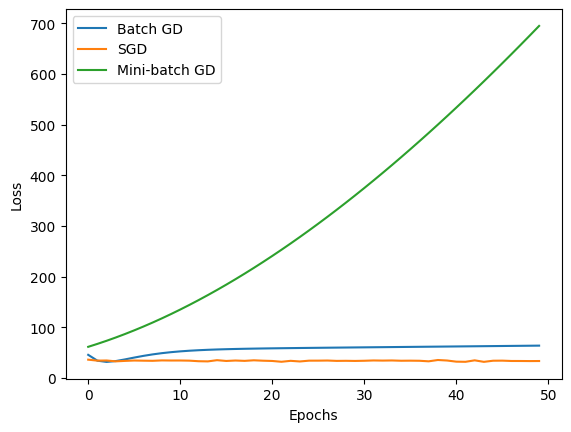

In [ ]:
plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_mb, label="Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Пример 2

In [ ]:
# Генерация данных
np.random.seed(42)
m = 1000
X = np.random.randn(m, 2)
y = 2 * X[:, 0] - 3 * X[:, 1] + 1 + np.random.randn(m) * 0.5

In [ ]:
# Добавим бесполезный признак (для демонстрации L1)
X = np.hstack([X, np.random.randn(m, 3)])  # Теперь 5 признаков (2 полезных, 3 шума)

In [ ]:
alpha = 0.01
epochs = 50
batch_size = 32
lambda_ = 0.1

In [ ]:
# Функция потерь + регуляризация
def compute_loss(X, y, theta, reg=None):
    m = len(X)
    mse = np.mean((X.dot(theta) - y) ** 2) / 2
    if reg == "L1":
        return mse + lambda_ * np.sum(np.abs(theta))
    elif reg == "L2":
        return mse + lambda_ * np.sum(theta ** 2)
    else:
        return mse

In [ ]:
# Mini-batch GD с регуляризацией
def train(X, y, reg=None):
    theta = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            error = X_batch.dot(theta) - y_batch
            grad = X_batch.T.dot(error) / len(X_batch)

            if reg == "L1":
                grad += lambda_ * np.sign(theta)
            elif reg == "L2":
                grad += lambda_ * theta

            theta -= alpha * grad
        losses.append(compute_loss(X, y, theta, reg))
    return theta, losses

In [ ]:
# Обучаем и сравниваем
theta_no_reg, loss_no_reg = train(X, y)
theta_l1, loss_l1 = train(X, y, reg="L1")
theta_l2, loss_l2 = train(X, y, reg="L2")

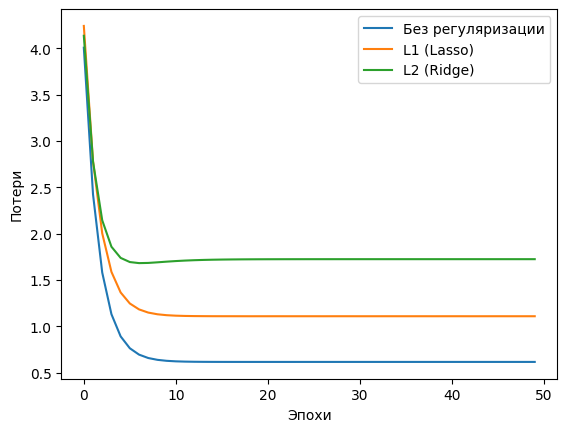

In [ ]:
# Визуализация потерь
plt.plot(loss_no_reg, label="Без регуляризации")
plt.plot(loss_l1, label="L1 (Lasso)")
plt.plot(loss_l2, label="L2 (Ridge)")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

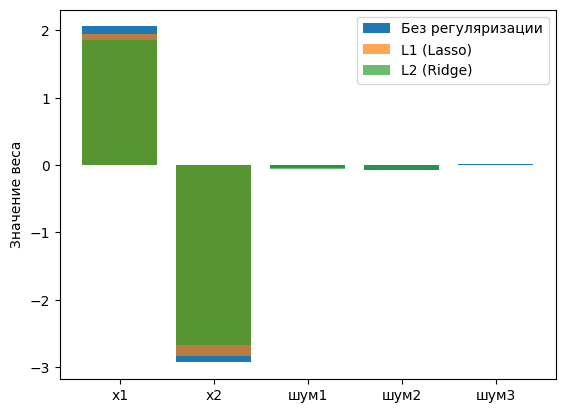

In [ ]:
# Визуализация весов
plt.bar(range(5), theta_no_reg, label="Без регуляризации")
plt.bar(range(5), theta_l1, label="L1 (Lasso)", alpha=0.7)
plt.bar(range(5), theta_l2, label="L2 (Ridge)", alpha=0.7)
plt.xticks(range(5), ["x1", "x2", "шум1", "шум2", "шум3"])
plt.ylabel("Значение веса")
plt.legend()
plt.show()

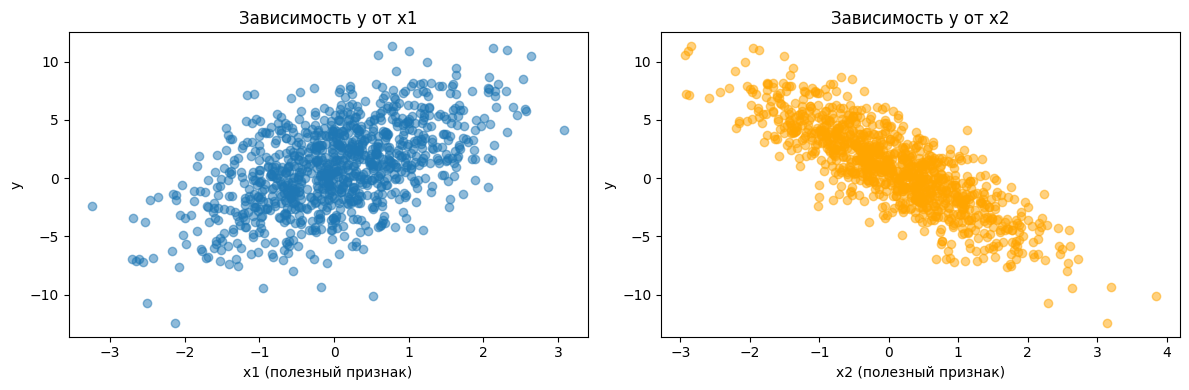

In [ ]:
plt.figure(figsize=(12, 4))

# График y vs x1
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, alpha=0.5)
plt.xlabel("x1 (полезный признак)")
plt.ylabel("y")
plt.title("Зависимость y от x1")

# График y vs x2
plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, alpha=0.5, color="orange")
plt.xlabel("x2 (полезный признак)")
plt.ylabel("y")
plt.title("Зависимость y от x2")

plt.tight_layout()
plt.show()

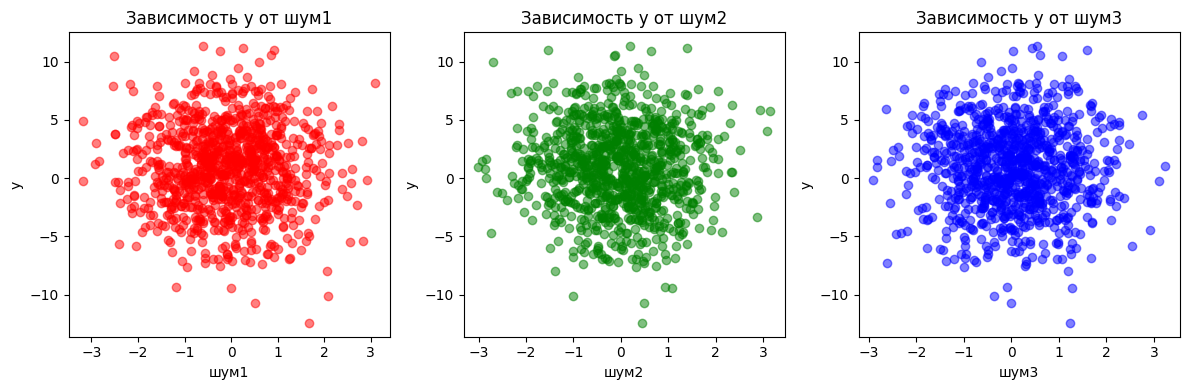

In [ ]:
plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 2+i], y, alpha=0.5, color=["red", "green", "blue"][i])
    plt.xlabel(f"шум{i+1}")
    plt.ylabel("y")
    plt.title(f"Зависимость y от шум{i+1}")

plt.tight_layout()
plt.show()

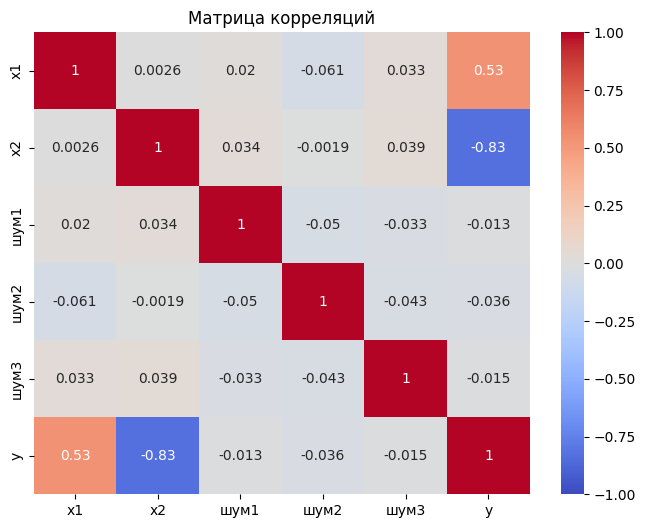

In [ ]:
# Создаем DataFrame для удобства
df = pd.DataFrame(X, columns=["x1", "x2", "шум1", "шум2", "шум3"])
df["y"] = y

# Строим тепловую карту корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()